# SECOND POINT

We will to improve our results by building different CNN with different characteristics. We perform data augmentation in order to have more data to train my network

In [1]:
import os
import glob
import scipy
import cv2 as cv2
import numpy as np
import keras as ks
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn
import pandas as pd

from tensorflow.keras import optimizers, initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from keras.layers.normalization import BatchNormalization

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import import_ipynb
import dataSetUtility as dsu
import plottingUtility as pltu

importing Jupyter notebook from dataSetUtility.ipynb
importing Jupyter notebook from plottingUtility.ipynb


# DATA AUGMENTATION

To improve the results we try to increase the number of data following a transformation from left to right. To do this we use a method from the dataSetUtility.

In [2]:
#path to the directories
pathTrain=r'C:\Users\39320\Desktop\computer vision\Computer-Vision-2020-main\ImageSet\train'
pathTest=r'C:\Users\39320\Desktop\computer vision\Computer-Vision-2020-main\ImageSet\test'

labels = [os.path.basename(i) for i in glob.glob(pathTrain + '/*', recursive=True)]
numberOfClasses = len(labels)
print("Class number: ", numberOfClasses)
print("Class names: ", labels)

Class number:  15
Class names:  ['Bedroom', 'Coast', 'Forest', 'Highway', 'Industrial', 'InsideCity', 'Kitchen', 'LivingRoom', 'Mountain', 'Office', 'OpenCountry', 'Store', 'Street', 'Suburb', 'TallBuilding']


In [3]:
xTrainAug, yTrainAug = dsu.dataAugmentation(pathTrain, labels)
xTest, yTest = dsu.loadImages(pathTest, labels)
print("Train len: ", len(xTrainAug))
print("Train label len: ", len(yTrainAug))
print("---------------------------------")
print("Test len: ", len(xTest))
print("Test label len: ", len(yTest))

Train len:  3000
Train label len:  3000
---------------------------------
Test len:  2985
Test label len:  2985


In [4]:
yTrainCategorical = to_categorical(yTrainAug)
yTestCategorical = to_categorical(yTest)

In [5]:
xTrain, xValidation, yTrain, yValidation = train_test_split(xTrainAug, yTrainCategorical, train_size=0.85, random_state=275)
print('len Train Set: ',len(xTrain))
print('len Validation Set: ',len(xValidation))
print('len Test Set: ',len(xTest))

len Train Set:  2550
len Validation Set:  450
len Test Set:  2985


# CNN MODEL

Initially we try to apply the data augmentation to the cnn of point one

In [6]:
sgd = tf.keras.optimizers.SGD(momentum=0.9,nesterov=True)
norm = ks.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
baseModel = Sequential([
    #first convolutional layer
    Conv2D(8, 3,strides=1, padding='valid', activation='relu', input_shape=(64,64,1)),
    MaxPooling2D(pool_size=2,strides=2),
    
    #second convolutional layer
    Conv2D(16, 3,strides=1, padding='valid',activation='relu',input_shape=(64,64,1)),
    MaxPooling2D(pool_size=2,strides=2),
    
    #third convolutional layer
    Conv2D(32, 3,strides=1, padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses, activation='relu',kernel_initializer=norm, bias_initializer='zeros'),
    Dense(numberOfClasses, activation='softmax')
])

baseModel.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])

In [68]:
baseModel.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 62, 62, 8)         80        
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
flatten_14 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 15)              

In [7]:
earlyStopping = EarlyStopping(min_delta=0.10,patience = 10, monitor='val_loss')

history=baseModel.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])

Epoch 1/100
80/80 [==============================] - 3s 29ms/step - loss: 2.7040 - accuracy: 0.0639 - val_loss: 2.6986 - val_accuracy: 0.1422
Epoch 2/100
80/80 [==============================] - 2s 27ms/step - loss: 2.6761 - accuracy: 0.0973 - val_loss: 2.7054 - val_accuracy: 0.0689
Epoch 3/100
80/80 [==============================] - 2s 26ms/step - loss: 2.6786 - accuracy: 0.0906 - val_loss: 2.6723 - val_accuracy: 0.0800
Epoch 4/100
80/80 [==============================] - 2s 26ms/step - loss: 2.6372 - accuracy: 0.1294 - val_loss: 2.6031 - val_accuracy: 0.1178
Epoch 5/100
80/80 [==============================] - 2s 28ms/step - loss: 2.5353 - accuracy: 0.1725 - val_loss: 2.5462 - val_accuracy: 0.1822
Epoch 6/100
80/80 [==============================] - 2s 26ms/step - loss: 2.4490 - accuracy: 0.2086 - val_loss: 2.3657 - val_accuracy: 0.2533
Epoch 7/100
80/80 [==============================] - 2s 27ms/step - loss: 2.2802 - accuracy: 0.2722 - val_loss: 2.2153 - val_accuracy: 0.3111
Epoch 

In [8]:
baseModel.evaluate(xTest, yTestCategorical)

prediction = baseModel.predict(xTest) 
yPred = dsu.predictClass(prediction)
cm=confusion_matrix(yTest, yPred)

94/94 [==============================] - 1s 8ms/step - loss: 3.7471 - accuracy: 0.3960


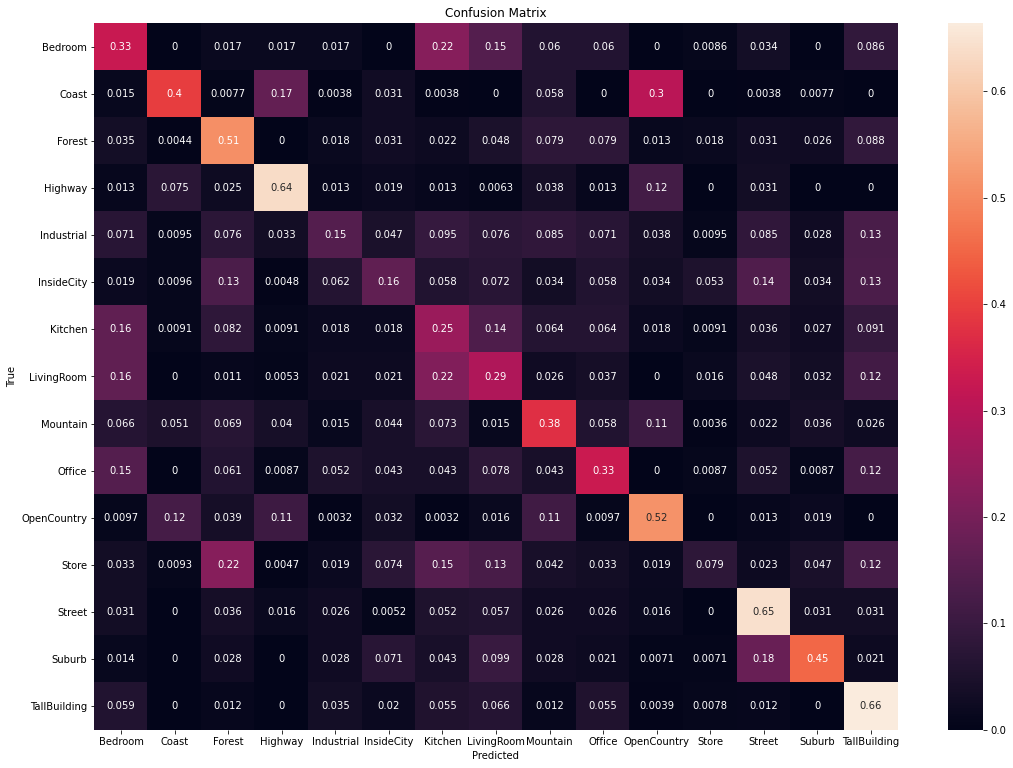

In [9]:
pltu.plotConfusionMatrix(cm, labels, "confusion_matrix_augmentation", "images_point_two/")

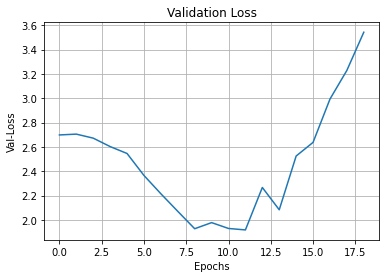

In [10]:
pltu.validationLoss(history, "images_point_two", "validation_loss_1")

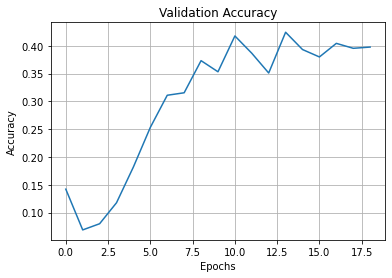

In [11]:
pltu.validationAccuracy(history, "images_point_two", "validation_acc_1")

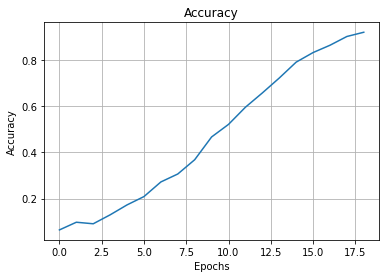

In [12]:
pltu.plottingAccuracy(history, "images_point_two", "accuracy_1")

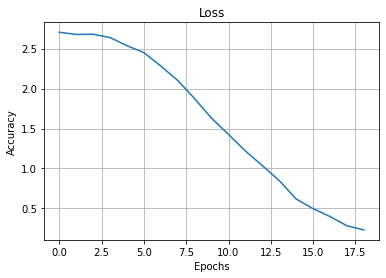

In [13]:
pltu.plottingLoss(history, "images_point_two", "loss_1")

In [14]:
print('Classification Report')
print(classification_report(yTest, yPred, target_names=labels))

Classification Report
              precision    recall  f1-score   support

     Bedroom       0.20      0.33      0.25       116
       Coast       0.59      0.40      0.47       260
      Forest       0.42      0.51      0.46       228
     Highway       0.49      0.64      0.56       160
  Industrial       0.34      0.15      0.20       211
  InsideCity       0.27      0.16      0.20       208
     Kitchen       0.13      0.25      0.17       110
  LivingRoom       0.25      0.29      0.27       189
    Mountain       0.42      0.38      0.40       274
      Office       0.25      0.33      0.28       115
 OpenCountry       0.51      0.52      0.51       310
       Store       0.39      0.08      0.13       215
      Street       0.50      0.65      0.56       192
      Suburb       0.50      0.45      0.48       141
TallBuilding       0.50      0.66      0.57       256

    accuracy                           0.40      2985
   macro avg       0.38      0.39      0.37      2985
weig

With the data augmentation alone we get an accuracy of about 0.44. Now let's try to use a BatchNormalization, add a Dropout, change the CNN structure trying to reach an accuracy of about 0.60

# Batch Normalization

To use tf.keras.layers.BatchNormalization you need to use set the axis you are considering. By default this has value -1 and must be an integer.
To improve regularization we also add dropout layers (tf.keras.layers.Dropout) to CNNs.

In [15]:
adam = optimizers.Adam()
print("Create CNN with kernel size = 3")
modelAdam3x3 = Sequential([
    Conv2D(filters=8,kernel_size=3,strides=1,padding = 'valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=32,kernel_size=3,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses,activation='relu',kernel_initializer=norm,bias_initializer='zeros'),
    BatchNormalization(axis = 1),
    Dense(numberOfClasses,activation='softmax')
])
modelAdam3x3.compile(loss='categorical_crossentropy',optimizer=adam,metrics = ['accuracy'])

print("Create CNN with kernel size = 5")
modelAdam5x5 = Sequential([
    Conv2D(filters=8,kernel_size=5,strides=1,padding = 'valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=16,kernel_size=5,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=32,kernel_size=5,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses,activation='relu',kernel_initializer=norm,bias_initializer='zeros'),
    BatchNormalization(axis = 1),
    Dense(numberOfClasses,activation='softmax')
])
modelAdam5x5.compile(loss='categorical_crossentropy',optimizer=adam,metrics = ['accuracy'])

print("Create CNN with kernel size = 7")
modelAdam7x7 = Sequential([
    Conv2D(filters=8,kernel_size=7,strides=1,padding = 'valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=16,kernel_size=7,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=32,kernel_size=7,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses,activation='relu',kernel_initializer=norm,bias_initializer='zeros'),
    BatchNormalization(axis = 1),
    Dense(numberOfClasses,activation='softmax')
])

modelAdam7x7.compile(loss='categorical_crossentropy',optimizer=adam,metrics = ['accuracy'])

Create CNN with kernel size = 3
Create CNN with kernel size = 5
Create CNN with kernel size = 7


In [71]:
modelAdam3x3.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 62, 62, 8)         80        
_________________________________________________________________
module_wrapper_39 (ModuleWra (None, 62, 62, 8)         248       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 31, 31, 8)         0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 29, 29, 16)        1168      
_________________________________________________________________
module_wrapper_40 (ModuleWra (None, 29, 29, 16)        116       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 14, 14, 16)      

In [16]:
earlyStopping = EarlyStopping(min_delta=0.10,patience = 10, monitor='val_loss')

print("Fit Adam Model with kernel size = 3")
historyAdam3=modelAdam3x3.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])
print("Fit Adam Model with kernel size = 5")
historyAdam5=modelAdam5x5.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])
print("Fit Adam Model with kernel size = 7")
historyAdam7=modelAdam7x7.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])

Fit Adam Model with kernel size = 3
Epoch 1/100
80/80 [==============================] - 5s 53ms/step - loss: 2.6180 - accuracy: 0.1471 - val_loss: 2.9260 - val_accuracy: 0.0689
Epoch 2/100
80/80 [==============================] - 5s 57ms/step - loss: 2.4127 - accuracy: 0.2329 - val_loss: 2.9894 - val_accuracy: 0.0689
Epoch 3/100
80/80 [==============================] - 4s 56ms/step - loss: 2.2521 - accuracy: 0.3102 - val_loss: 3.0765 - val_accuracy: 0.1111
Epoch 4/100
80/80 [==============================] - 4s 56ms/step - loss: 2.0590 - accuracy: 0.3898 - val_loss: 2.9552 - val_accuracy: 0.1022
Epoch 5/100
80/80 [==============================] - 5s 56ms/step - loss: 1.8771 - accuracy: 0.4600 - val_loss: 2.9858 - val_accuracy: 0.1822
Epoch 6/100
80/80 [==============================] - 5s 66ms/step - loss: 1.6864 - accuracy: 0.5345 - val_loss: 2.8471 - val_accuracy: 0.1644
Epoch 7/100
80/80 [==============================] - 6s 70ms/step - loss: 1.5160 - accuracy: 0.5835 - val_loss: 

Epoch 13/100
80/80 [==============================] - 6s 79ms/step - loss: 2.1514 - accuracy: 0.3055 - val_loss: 2.4150 - val_accuracy: 0.1844
Epoch 14/100
80/80 [==============================] - 6s 77ms/step - loss: 2.0747 - accuracy: 0.3314 - val_loss: 2.3585 - val_accuracy: 0.2333
Epoch 15/100
80/80 [==============================] - 7s 83ms/step - loss: 2.0092 - accuracy: 0.3510 - val_loss: 2.2043 - val_accuracy: 0.3044
Epoch 16/100
80/80 [==============================] - 7s 84ms/step - loss: 1.9339 - accuracy: 0.3718 - val_loss: 2.0656 - val_accuracy: 0.3489
Epoch 17/100
80/80 [==============================] - 6s 78ms/step - loss: 1.8670 - accuracy: 0.3957 - val_loss: 2.0035 - val_accuracy: 0.3533
Epoch 18/100
80/80 [==============================] - 6s 81ms/step - loss: 1.7958 - accuracy: 0.4051 - val_loss: 1.8612 - val_accuracy: 0.3867
Epoch 19/100
80/80 [==============================] - 7s 84ms/step - loss: 1.7335 - accuracy: 0.4384 - val_loss: 1.9495 - val_accuracy: 0.3800

In [17]:
modelAdam3x3.evaluate(xTest, yTestCategorical)
modelAdam5x5.evaluate(xTest, yTestCategorical)
modelAdam7x7.evaluate(xTest, yTestCategorical)

predictionAdam3 = modelAdam3x3.predict(xTest)
predictionAdam5 = modelAdam5x5.predict(xTest)
predictionAdam7 = modelAdam7x7.predict(xTest)

yPredAdam3 = dsu.predictClass(predictionAdam3)
yPredAdam5 = dsu.predictClass(predictionAdam5)
yPredAdam7 = dsu.predictClass(predictionAdam7)

94/94 [==============================] - 2s 18ms/step - loss: 1.8224 - accuracy: 0.4576


In [18]:
cmAdam3 = confusion_matrix(yTest, yPredAdam3)
cmAdam5 = confusion_matrix(yTest, yPredAdam5)
cmAdam7 = confusion_matrix(yTest, yPredAdam7)

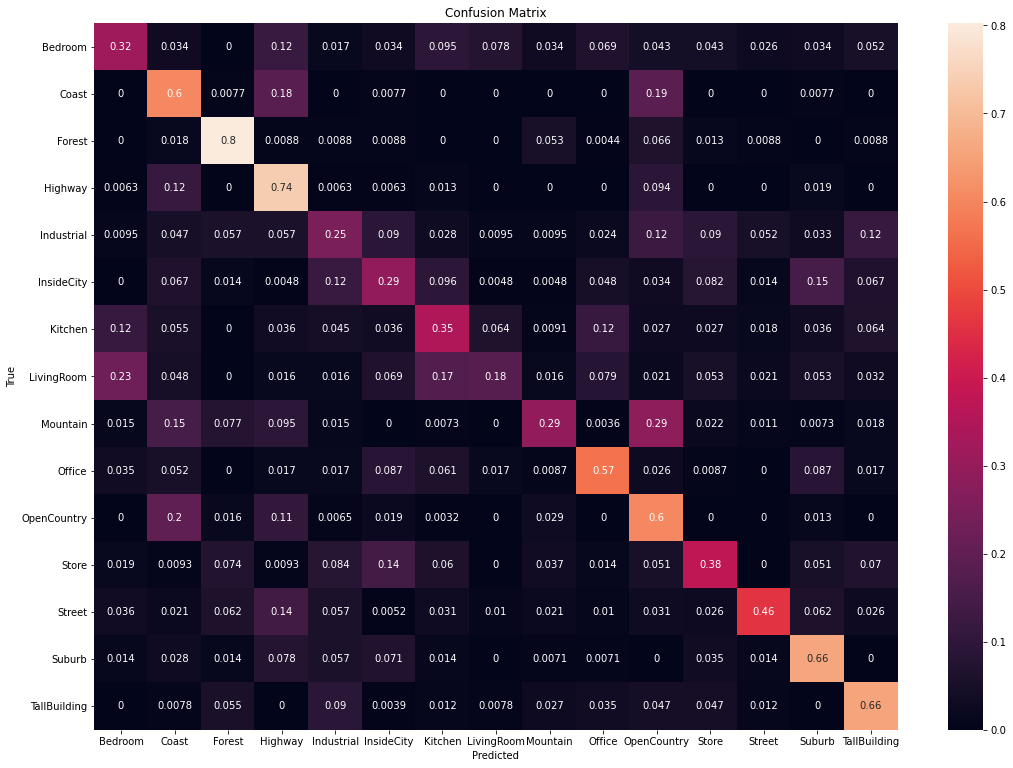

In [19]:
pltu.plotConfusionMatrix(cmAdam3, labels, "confusion_matrix_augmentation_adam_3", "images_point_two/")

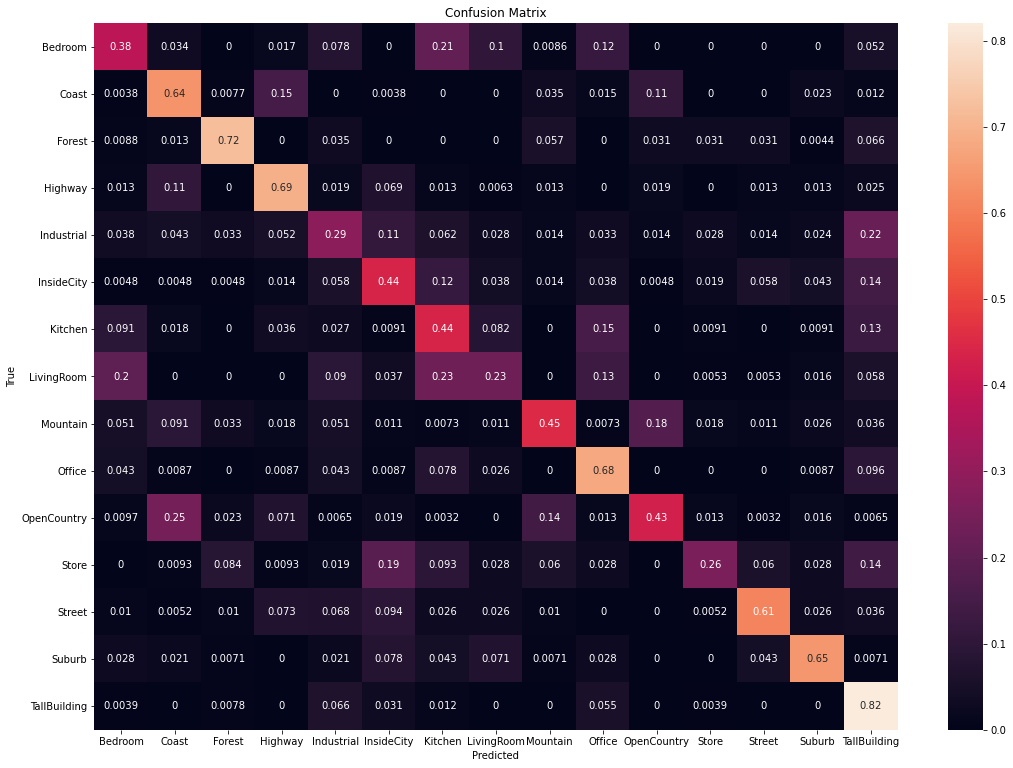

In [20]:
pltu.plotConfusionMatrix(cmAdam5, labels, "confusion_matrix_augmentation_adam_5", "images_point_two/")

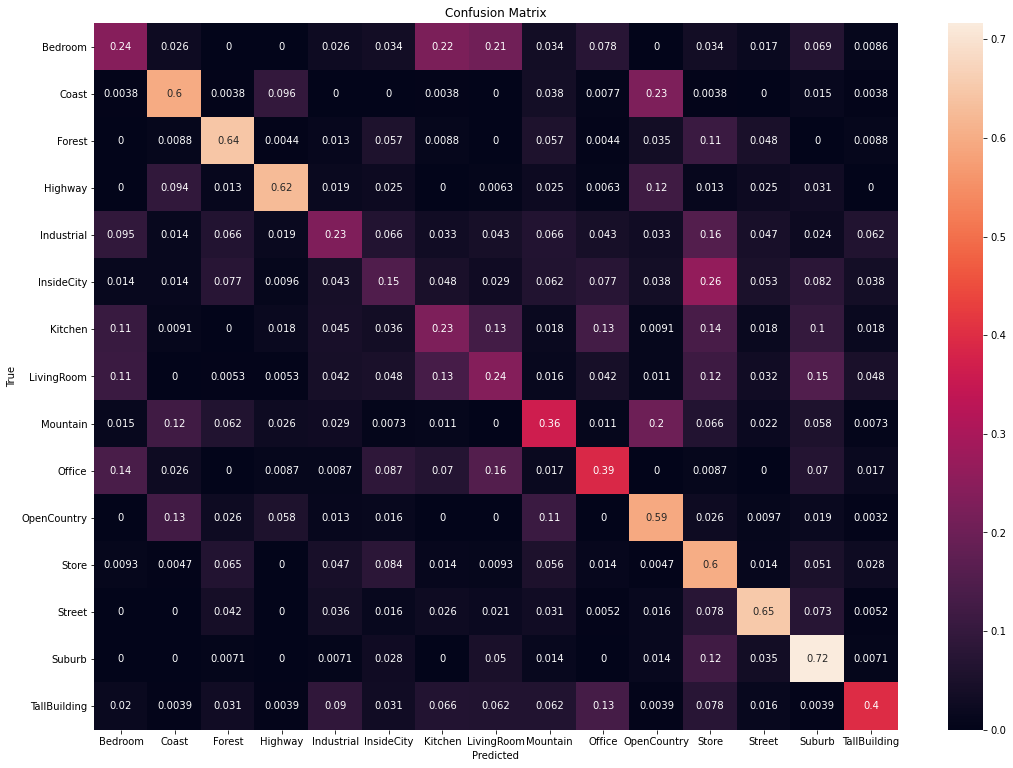

In [21]:
pltu.plotConfusionMatrix(cmAdam7, labels, "confusion_matrix_augmentation_adam_7", "images_point_two/")

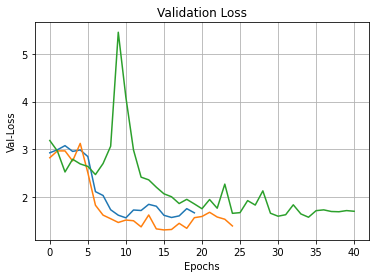

In [22]:
pltu.validationLoss(historyAdam3, "images_point_two", "validation_loss_adam_3")
pltu.validationLoss(historyAdam5, "images_point_two", "validation_loss_adam_5")
pltu.validationLoss(historyAdam7, "images_point_two", "validation_loss_adam_7")

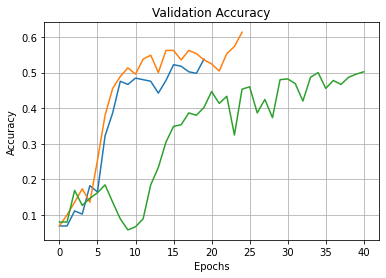

In [23]:
pltu.validationAccuracy(historyAdam3, "images_point_two", "validation_acc_3")
pltu.validationAccuracy(historyAdam5, "images_point_two", "validation_acc_5")
pltu.validationAccuracy(historyAdam7, "images_point_two", "validation_acc_7")

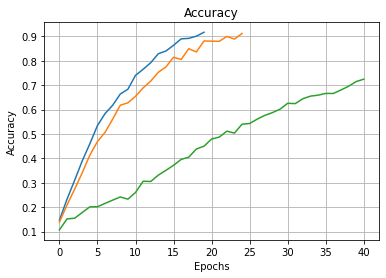

In [24]:
pltu.plottingAccuracy(historyAdam3, "images_point_two", "accuracy_3")
pltu.plottingAccuracy(historyAdam5, "images_point_two", "accuracy_5")
pltu.plottingAccuracy(historyAdam7, "images_point_two", "accuracy_7")

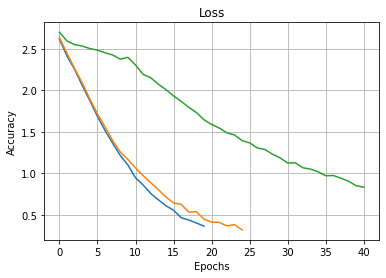

In [25]:
pltu.plottingLoss(historyAdam3, "images_point_two", "loss_1")
pltu.plottingLoss(historyAdam5, "images_point_two", "loss_3")
pltu.plottingLoss(historyAdam7, "images_point_two", "loss_7")

In [72]:
print('Classification Report')
print(classification_report(yTest, yPredAdam3, target_names=labels))

Classification Report
              precision    recall  f1-score   support

     Bedroom       0.33      0.39      0.36       116
       Coast       0.63      0.60      0.61       260
      Forest       0.39      0.80      0.52       228
     Highway       0.68      0.54      0.60       160
  Industrial       0.38      0.11      0.17       211
  InsideCity       0.49      0.20      0.28       208
     Kitchen       0.23      0.33      0.27       110
  LivingRoom       0.42      0.21      0.28       189
    Mountain       0.39      0.57      0.46       274
      Office       0.39      0.43      0.41       115
 OpenCountry       0.47      0.69      0.56       310
       Store       0.41      0.22      0.29       215
      Street       0.54      0.53      0.54       192
      Suburb       0.66      0.52      0.58       141
TallBuilding       0.61      0.53      0.57       256

    accuracy                           0.46      2985
   macro avg       0.47      0.44      0.43      2985
weig

In [73]:
print('Classification Report')
print(classification_report(yTest, yPredAdam5, target_names=labels))

Classification Report
              precision    recall  f1-score   support

     Bedroom       0.42      0.21      0.28       116
       Coast       0.57      0.62      0.59       260
      Forest       0.57      0.74      0.64       228
     Highway       0.62      0.64      0.63       160
  Industrial       0.28      0.25      0.26       211
  InsideCity       0.32      0.28      0.30       208
     Kitchen       0.22      0.21      0.22       110
  LivingRoom       0.27      0.40      0.32       189
    Mountain       0.54      0.29      0.38       274
      Office       0.44      0.55      0.49       115
 OpenCountry       0.47      0.65      0.55       310
       Store       0.53      0.42      0.47       215
      Street       0.77      0.52      0.62       192
      Suburb       0.47      0.72      0.57       141
TallBuilding       0.71      0.55      0.62       256

    accuracy                           0.48      2985
   macro avg       0.48      0.47      0.46      2985
weig

In [74]:
print('Classification Report')
print(classification_report(yTest, yPredAdam7, target_names=labels))

Classification Report
              precision    recall  f1-score   support

     Bedroom       0.29      0.34      0.32       116
       Coast       0.45      0.64      0.53       260
      Forest       0.52      0.67      0.58       228
     Highway       0.46      0.69      0.55       160
  Industrial       0.26      0.14      0.18       211
  InsideCity       0.25      0.15      0.19       208
     Kitchen       0.17      0.19      0.18       110
  LivingRoom       0.29      0.21      0.24       189
    Mountain       0.40      0.24      0.30       274
      Office       0.16      0.12      0.14       115
 OpenCountry       0.43      0.47      0.45       310
       Store       0.45      0.42      0.43       215
      Street       0.58      0.64      0.61       192
      Suburb       0.48      0.66      0.56       141
TallBuilding       0.61      0.63      0.62       256

    accuracy                           0.43      2985
   macro avg       0.39      0.41      0.39      2985
weig

# Ensemble Of Network

The idea is to combine a CNN and the use of the majority vote in the average of the prediction probabilities.

Ensemble a new network with 10 iterations

In [26]:
earlyStopping = EarlyStopping(min_delta=0.0, patience = 10)
prediction = np.zeros((xTest.shape[0],15))
predictionVoting = []
loss = []
validationLoss = []
validationAccuracy = []
accuracy = []

for i in range(10):
    network = Sequential([
        Conv2D(filters=8,kernel_size=3,strides=1,padding = 'valid',activation='relu',input_shape=(64,64,1)),
        BatchNormalization(axis = 1),
        MaxPooling2D(pool_size=2,strides=2),
        Dropout(0.2),
        Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
        BatchNormalization(axis = 1),
        MaxPooling2D(pool_size=2,strides=2),
        Dropout(0.2),
        Conv2D(filters=32,kernel_size=3,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
        Flatten(),
        Dense(numberOfClasses,activation='relu',kernel_initializer=norm,bias_initializer='zeros'),
        BatchNormalization(axis = 1),
        Dense(numberOfClasses,activation='softmax')
    ])
    network.compile(loss='categorical_crossentropy',optimizer=adam,metrics = ['accuracy'])
    historyNetwork=network.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])
    preditcion = prediction + network.predict(xTest)
    predictionVoting.append(dsu.predictClass(network.predict(xTest))) ## ma non fa il voting dato che si allenano in maniera indipendenti le reti
    #qua siamo ancora dentro il ciclo for, non può sapre delle altre reti ???
    loss.append(historyNetwork.history['loss'])
    validationLoss.append(historyNetwork.history['val_loss'])
    validationAccuracy.append(historyNetwork.history['val_accuracy'])
    accuracy.append(historyNetwork.history['accuracy'])

prediction = prediction/10
    

Epoch 1/100
80/80 [==============================] - 5s 53ms/step - loss: 2.5059 - accuracy: 0.2231 - val_loss: 3.7568 - val_accuracy: 0.0600
Epoch 2/100
80/80 [==============================] - 4s 54ms/step - loss: 2.1424 - accuracy: 0.3427 - val_loss: 4.2897 - val_accuracy: 0.0711
Epoch 3/100
80/80 [==============================] - 5s 59ms/step - loss: 1.9265 - accuracy: 0.3914 - val_loss: 4.2881 - val_accuracy: 0.0756
Epoch 4/100
80/80 [==============================] - 5s 59ms/step - loss: 1.7024 - accuracy: 0.4525 - val_loss: 4.3949 - val_accuracy: 0.1000
Epoch 5/100
80/80 [==============================] - 5s 57ms/step - loss: 1.5164 - accuracy: 0.5243 - val_loss: 3.9671 - val_accuracy: 0.1600
Epoch 6/100
80/80 [==============================] - 5s 58ms/step - loss: 1.3679 - accuracy: 0.5486 - val_loss: 3.0911 - val_accuracy: 0.2111
Epoch 7/100
80/80 [==============================] - 5s 57ms/step - loss: 1.2412 - accuracy: 0.6082 - val_loss: 2.8297 - val_accuracy: 0.2333
Epoch 

80/80 [==============================] - 5s 63ms/step - loss: 1.0874 - accuracy: 0.6698 - val_loss: 1.9153 - val_accuracy: 0.3778
Epoch 9/100
80/80 [==============================] - 5s 64ms/step - loss: 0.9344 - accuracy: 0.7192 - val_loss: 1.6828 - val_accuracy: 0.4489
Epoch 10/100
80/80 [==============================] - 5s 63ms/step - loss: 0.8659 - accuracy: 0.7306 - val_loss: 1.7496 - val_accuracy: 0.4356
Epoch 11/100
80/80 [==============================] - 5s 64ms/step - loss: 0.7656 - accuracy: 0.7600 - val_loss: 1.5203 - val_accuracy: 0.5200
Epoch 12/100
80/80 [==============================] - 5s 63ms/step - loss: 0.6927 - accuracy: 0.7902 - val_loss: 1.5004 - val_accuracy: 0.5089
Epoch 13/100
80/80 [==============================] - 5s 64ms/step - loss: 0.5900 - accuracy: 0.8349 - val_loss: 1.5891 - val_accuracy: 0.4889
Epoch 14/100
80/80 [==============================] - 5s 64ms/step - loss: 0.5354 - accuracy: 0.8510 - val_loss: 1.5138 - val_accuracy: 0.5200
Epoch 15/100


80/80 [==============================] - 5s 63ms/step - loss: 0.2618 - accuracy: 0.9325 - val_loss: 1.5979 - val_accuracy: 0.5622
Epoch 21/100
80/80 [==============================] - 5s 63ms/step - loss: 0.2367 - accuracy: 0.9408 - val_loss: 1.6261 - val_accuracy: 0.5511
Epoch 22/100
80/80 [==============================] - 5s 69ms/step - loss: 0.1982 - accuracy: 0.9529 - val_loss: 1.6316 - val_accuracy: 0.5667
Epoch 23/100
80/80 [==============================] - 6s 76ms/step - loss: 0.1891 - accuracy: 0.9510 - val_loss: 1.8078 - val_accuracy: 0.5111
Epoch 24/100
80/80 [==============================] - 5s 65ms/step - loss: 0.1789 - accuracy: 0.9541 - val_loss: 1.7666 - val_accuracy: 0.5222
Epoch 1/100
80/80 [==============================] - 6s 64ms/step - loss: 2.6528 - accuracy: 0.1365 - val_loss: 2.6116 - val_accuracy: 0.1556
Epoch 2/100
80/80 [==============================] - 5s 66ms/step - loss: 2.5147 - accuracy: 0.1796 - val_loss: 2.6977 - val_accuracy: 0.1156
Epoch 3/100
80

80/80 [==============================] - 5s 60ms/step - loss: 0.5833 - accuracy: 0.8145 - val_loss: 1.7389 - val_accuracy: 0.5000
Epoch 23/100
80/80 [==============================] - 5s 59ms/step - loss: 0.5593 - accuracy: 0.8125 - val_loss: 1.8908 - val_accuracy: 0.4356
Epoch 24/100
80/80 [==============================] - 5s 59ms/step - loss: 0.4899 - accuracy: 0.8514 - val_loss: 1.8033 - val_accuracy: 0.4711
Epoch 25/100
80/80 [==============================] - 5s 63ms/step - loss: 0.4646 - accuracy: 0.8592 - val_loss: 1.9412 - val_accuracy: 0.4356
Epoch 26/100
80/80 [==============================] - 5s 66ms/step - loss: 0.4526 - accuracy: 0.8620 - val_loss: 1.5842 - val_accuracy: 0.5156
Epoch 27/100
80/80 [==============================] - 5s 64ms/step - loss: 0.4230 - accuracy: 0.8608 - val_loss: 1.7926 - val_accuracy: 0.4889
Epoch 28/100
80/80 [==============================] - 5s 64ms/step - loss: 0.4025 - accuracy: 0.8761 - val_loss: 1.7499 - val_accuracy: 0.4578
Epoch 29/100

80/80 [==============================] - 5s 59ms/step - loss: 0.4209 - accuracy: 0.8769 - val_loss: 1.7327 - val_accuracy: 0.4800
Epoch 24/100
80/80 [==============================] - 5s 59ms/step - loss: 0.3978 - accuracy: 0.8835 - val_loss: 1.6843 - val_accuracy: 0.5089
Epoch 25/100
80/80 [==============================] - 6s 72ms/step - loss: 0.3709 - accuracy: 0.8953 - val_loss: 1.9100 - val_accuracy: 0.4756
Epoch 26/100
80/80 [==============================] - 5s 68ms/step - loss: 0.3345 - accuracy: 0.9063 - val_loss: 2.1519 - val_accuracy: 0.4822
Epoch 27/100
80/80 [==============================] - 6s 72ms/step - loss: 0.3397 - accuracy: 0.9047 - val_loss: 1.6815 - val_accuracy: 0.4933
Epoch 28/100
80/80 [==============================] - 6s 77ms/step - loss: 0.2953 - accuracy: 0.9286 - val_loss: 2.0213 - val_accuracy: 0.4711
Epoch 29/100
80/80 [==============================] - 6s 76ms/step - loss: 0.3170 - accuracy: 0.9063 - val_loss: 1.7710 - val_accuracy: 0.5044
Epoch 30/100

Plot of some graphs

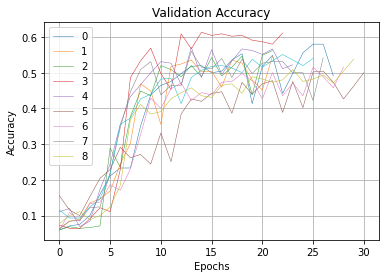

In [27]:
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
for p in validationAccuracy:
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.plot(p,linewidth=0.5)

plt.grid()

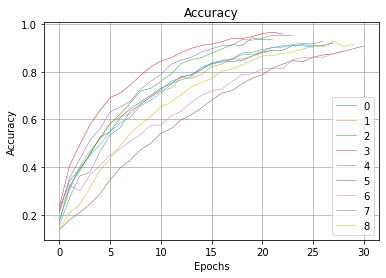

In [28]:
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
for p in accuracy:
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.plot(p,linewidth=0.5)
plt.grid()

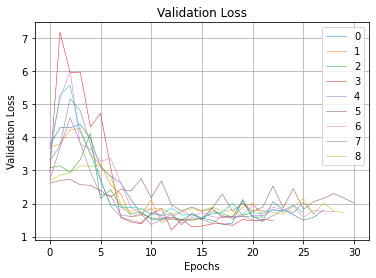

In [29]:
plt.title("Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
for p in validationLoss:
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.plot(p,linewidth=0.5)
plt.grid()

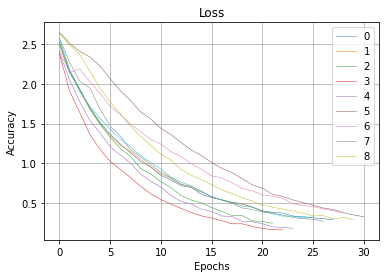

In [30]:
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
for p in loss:
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.plot(p,linewidth=0.5)
plt.grid()

# point 2 with crop e rotation

In [31]:
xTrainAugCropRot, yTrainAugCropRot = dsu.dataAugmentationWithCropRot(pathTrain, labels)
xTest, yTest = dsu.loadImages(pathTest, labels)
print("Train len: ", len(xTrainAugCropRot))
print("Train label len: ", len(yTrainAugCropRot))
print("---------------------------------")
print("Test len: ", len(xTest))
print("Test label len: ", len(yTest))

Train len:  6000
Train label len:  6000
---------------------------------
Test len:  2985
Test label len:  2985


In [32]:
yTrainCategorical = to_categorical(yTrainAugCropRot)
yTestCategorical = to_categorical(yTest)

In [33]:
xTrain, xValidation, yTrain, yValidation = train_test_split(xTrainAugCropRot, yTrainCategorical, train_size=0.85, random_state=275)
print('len Train Set: ',len(xTrain))
print('len Validation Set: ',len(xValidation))
print('len Test Set: ',len(xTest))

len Train Set:  5100
len Validation Set:  900
len Test Set:  2985


# CNN MODEL

Initially we try to apply the data augmentation to the cnn of point one

In [34]:
sgd = tf.keras.optimizers.SGD(momentum=0.9,nesterov=True)
norm = ks.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
baseModel = Sequential([
    #first convolutional layer
    Conv2D(8, 3,strides=1, padding='valid', activation='relu', input_shape=(64,64,1)),
    MaxPooling2D(pool_size=2,strides=2),
    
    #second convolutional layer
    Conv2D(16, 3,strides=1, padding='valid',activation='relu',input_shape=(64,64,1)),
    MaxPooling2D(pool_size=2,strides=2),
    
    #third convolutional layer
    Conv2D(32, 3,strides=1, padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses, activation='relu',kernel_initializer=norm, bias_initializer='zeros'),
    Dense(numberOfClasses, activation='softmax')
])

baseModel.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])

In [35]:
earlyStopping = EarlyStopping(min_delta=0.10,patience = 10, monitor='val_loss')

history=baseModel.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])

Epoch 1/100
160/160 [==============================] - 5s 31ms/step - loss: 2.7031 - accuracy: 0.0808 - val_loss: 2.6760 - val_accuracy: 0.1333
Epoch 2/100
160/160 [==============================] - 5s 32ms/step - loss: 2.6418 - accuracy: 0.1312 - val_loss: 2.5816 - val_accuracy: 0.1467
Epoch 3/100
160/160 [==============================] - 5s 32ms/step - loss: 2.4957 - accuracy: 0.1914 - val_loss: 2.4182 - val_accuracy: 0.2211
Epoch 4/100
160/160 [==============================] - 5s 33ms/step - loss: 2.2815 - accuracy: 0.2633 - val_loss: 2.2632 - val_accuracy: 0.2711
Epoch 5/100
160/160 [==============================] - 5s 32ms/step - loss: 2.0550 - accuracy: 0.3322 - val_loss: 2.2894 - val_accuracy: 0.2733
Epoch 6/100
160/160 [==============================] - 5s 33ms/step - loss: 1.9063 - accuracy: 0.3733 - val_loss: 2.0477 - val_accuracy: 0.3378
Epoch 7/100
160/160 [==============================] - 5s 32ms/step - loss: 1.7607 - accuracy: 0.4271 - val_loss: 2.1537 - val_accuracy:

In [36]:
baseModel.evaluate(xTest, yTestCategorical)

prediction = baseModel.predict(xTest) 
yPred = dsu.predictClass(prediction)
cm=confusion_matrix(yTest, yPred)

94/94 [==============================] - 1s 10ms/step - loss: 3.8679 - accuracy: 0.3578


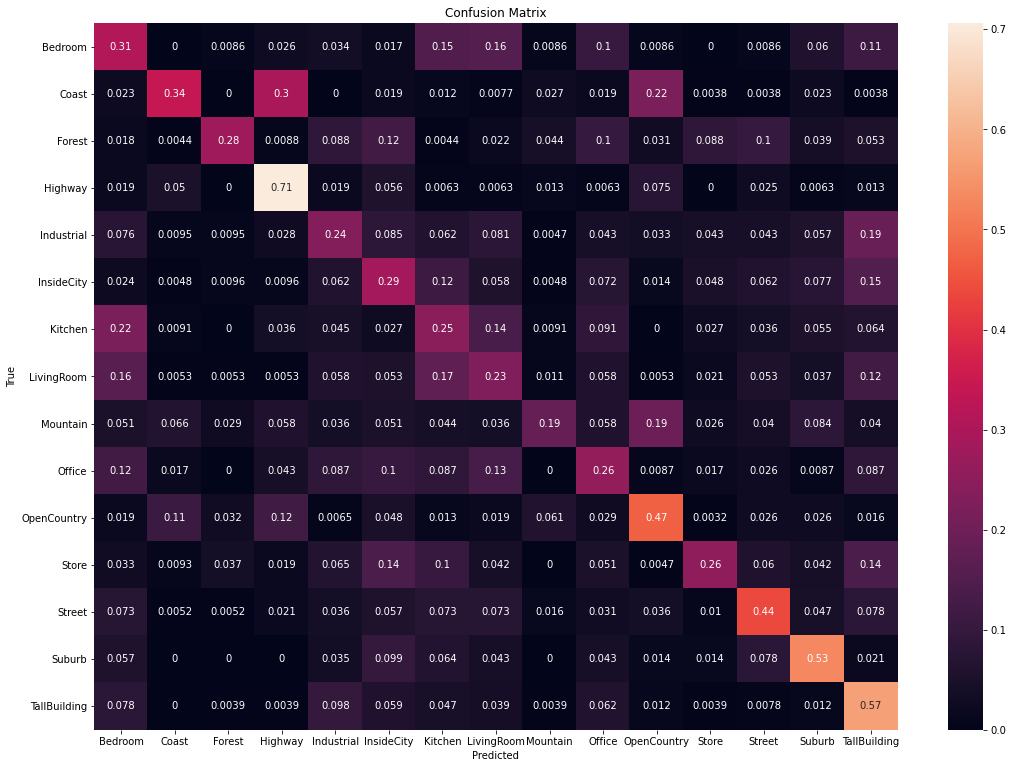

In [37]:
pltu.plotConfusionMatrix(cm, labels, "confusion_matrix_augmentation", "images_point_two/")

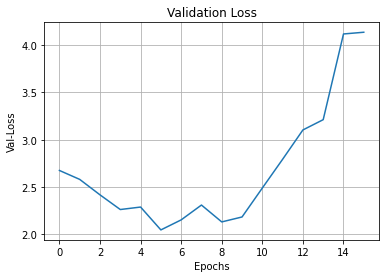

In [38]:
pltu.validationLoss(history, "images_point_two", "validation_loss_1")

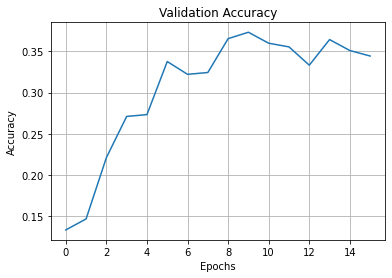

In [39]:
pltu.validationAccuracy(history, "images_point_two", "validation_acc_1")

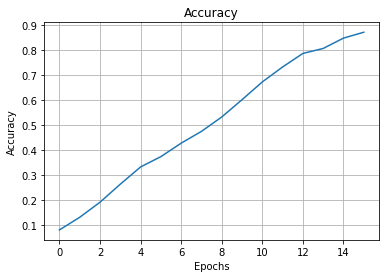

In [40]:
pltu.plottingAccuracy(history, "images_point_two", "accuracy_1")

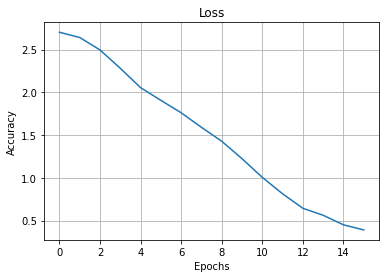

In [41]:
pltu.plottingLoss(history, "images_point_two", "loss_1")

In [42]:
print('Classification Report')
print(classification_report(yTest, yPred, target_names=labels))

Classification Report
              precision    recall  f1-score   support

     Bedroom       0.17      0.31      0.22       116
       Coast       0.56      0.34      0.42       260
      Forest       0.65      0.28      0.39       228
     Highway       0.41      0.71      0.52       160
  Industrial       0.28      0.24      0.26       211
  InsideCity       0.24      0.29      0.26       208
     Kitchen       0.13      0.25      0.17       110
  LivingRoom       0.23      0.23      0.23       189
    Mountain       0.52      0.19      0.27       274
      Office       0.17      0.26      0.20       115
 OpenCountry       0.49      0.47      0.48       310
       Store       0.47      0.26      0.33       215
      Street       0.43      0.44      0.43       192
      Suburb       0.39      0.53      0.45       141
TallBuilding       0.42      0.57      0.48       256

    accuracy                           0.36      2985
   macro avg       0.37      0.36      0.34      2985
weig

With the data augmentation alone we get an accuracy of about 0.44. Now let's try to use a BatchNormalization, add a Dropout, change the CNN structure trying to reach an accuracy of about 0.60

# Batch Normalization

To use tf.keras.layers.BatchNormalization you need to use set the axis you are considering. By default this has value -1 and must be an integer.
To improve regularization we also add dropout layers (tf.keras.layers.Dropout) to CNNs.

In [43]:
adam = optimizers.Adam()
print("Create CNN with kernel size = 3")
modelAdam3x3 = Sequential([
    Conv2D(filters=8,kernel_size=3,strides=1,padding = 'valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=32,kernel_size=3,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses,activation='relu',kernel_initializer=norm,bias_initializer='zeros'),
    BatchNormalization(axis = 1),
    Dense(numberOfClasses,activation='softmax')
])
modelAdam3x3.compile(loss='categorical_crossentropy',optimizer=adam,metrics = ['accuracy'])

print("Create CNN with kernel size = 5")
modelAdam5x5 = Sequential([
    Conv2D(filters=8,kernel_size=5,strides=1,padding = 'valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=16,kernel_size=5,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=32,kernel_size=5,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses,activation='relu',kernel_initializer=norm,bias_initializer='zeros'),
    BatchNormalization(axis = 1),
    Dense(numberOfClasses,activation='softmax')
])
modelAdam5x5.compile(loss='categorical_crossentropy',optimizer=adam,metrics = ['accuracy'])

print("Create CNN with kernel size = 7")
modelAdam7x7 = Sequential([
    Conv2D(filters=8,kernel_size=7,strides=1,padding = 'valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=16,kernel_size=7,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=32,kernel_size=7,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses,activation='relu',kernel_initializer=norm,bias_initializer='zeros'),
    BatchNormalization(axis = 1),
    Dense(numberOfClasses,activation='softmax')
])

modelAdam7x7.compile(loss='categorical_crossentropy',optimizer=adam,metrics = ['accuracy'])

Create CNN with kernel size = 3
Create CNN with kernel size = 5
Create CNN with kernel size = 7


In [44]:
earlyStopping = EarlyStopping(min_delta=0.10,patience = 10, monitor='val_loss')

print("Fit Adam Model with kernel size = 3")
historyAdam3=modelAdam3x3.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])
print("Fit Adam Model with kernel size = 5")
historyAdam5=modelAdam5x5.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])
print("Fit Adam Model with kernel size = 7")
historyAdam7=modelAdam7x7.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])

Fit Adam Model with kernel size = 3
Epoch 1/100
160/160 [==============================] - 10s 60ms/step - loss: 2.6348 - accuracy: 0.1308 - val_loss: 3.0476 - val_accuracy: 0.0656
Epoch 2/100
160/160 [==============================] - 10s 62ms/step - loss: 2.3502 - accuracy: 0.2392 - val_loss: 3.5798 - val_accuracy: 0.0678
Epoch 3/100
160/160 [==============================] - 10s 63ms/step - loss: 2.1267 - accuracy: 0.3278 - val_loss: 3.1863 - val_accuracy: 0.1167
Epoch 4/100
160/160 [==============================] - 10s 61ms/step - loss: 1.9430 - accuracy: 0.3935 - val_loss: 2.6737 - val_accuracy: 0.1944
Epoch 5/100
160/160 [==============================] - 10s 61ms/step - loss: 1.8037 - accuracy: 0.4278 - val_loss: 2.2355 - val_accuracy: 0.2989
Epoch 6/100
160/160 [==============================] - 10s 61ms/step - loss: 1.6670 - accuracy: 0.4759 - val_loss: 2.3771 - val_accuracy: 0.3011
Epoch 7/100
160/160 [==============================] - 10s 64ms/step - loss: 1.5222 - accuracy

160/160 [==============================] - 13s 84ms/step - loss: 1.9112 - accuracy: 0.3682 - val_loss: 2.0346 - val_accuracy: 0.3433
Epoch 19/100
160/160 [==============================] - 13s 83ms/step - loss: 1.8855 - accuracy: 0.3692 - val_loss: 2.0263 - val_accuracy: 0.3511
Epoch 20/100
160/160 [==============================] - 14s 85ms/step - loss: 1.8510 - accuracy: 0.3839 - val_loss: 2.1329 - val_accuracy: 0.3256
Epoch 21/100
160/160 [==============================] - 14s 88ms/step - loss: 1.8066 - accuracy: 0.3990 - val_loss: 1.9615 - val_accuracy: 0.3711
Epoch 22/100
160/160 [==============================] - 14s 86ms/step - loss: 1.7738 - accuracy: 0.4031 - val_loss: 2.0710 - val_accuracy: 0.3289
Epoch 23/100
160/160 [==============================] - 14s 86ms/step - loss: 1.7511 - accuracy: 0.4090 - val_loss: 1.9162 - val_accuracy: 0.3811
Epoch 24/100
160/160 [==============================] - 14s 86ms/step - loss: 1.7152 - accuracy: 0.4180 - val_loss: 2.0123 - val_accuracy

In [45]:
modelAdam3x3.evaluate(xTest, yTestCategorical)
modelAdam5x5.evaluate(xTest, yTestCategorical)
modelAdam7x7.evaluate(xTest, yTestCategorical)

predictionAdam3 = modelAdam3x3.predict(xTest)
predictionAdam5 = modelAdam5x5.predict(xTest)
predictionAdam7 = modelAdam7x7.predict(xTest)

yPredAdam3 = dsu.predictClass(predictionAdam3)
yPredAdam5 = dsu.predictClass(predictionAdam5)
yPredAdam7 = dsu.predictClass(predictionAdam7)

94/94 [==============================] - 2s 20ms/step - loss: 1.7398 - accuracy: 0.4295


In [46]:
cmAdam3 = confusion_matrix(yTest, yPredAdam3)
cmAdam5 = confusion_matrix(yTest, yPredAdam5)
cmAdam7 = confusion_matrix(yTest, yPredAdam7)

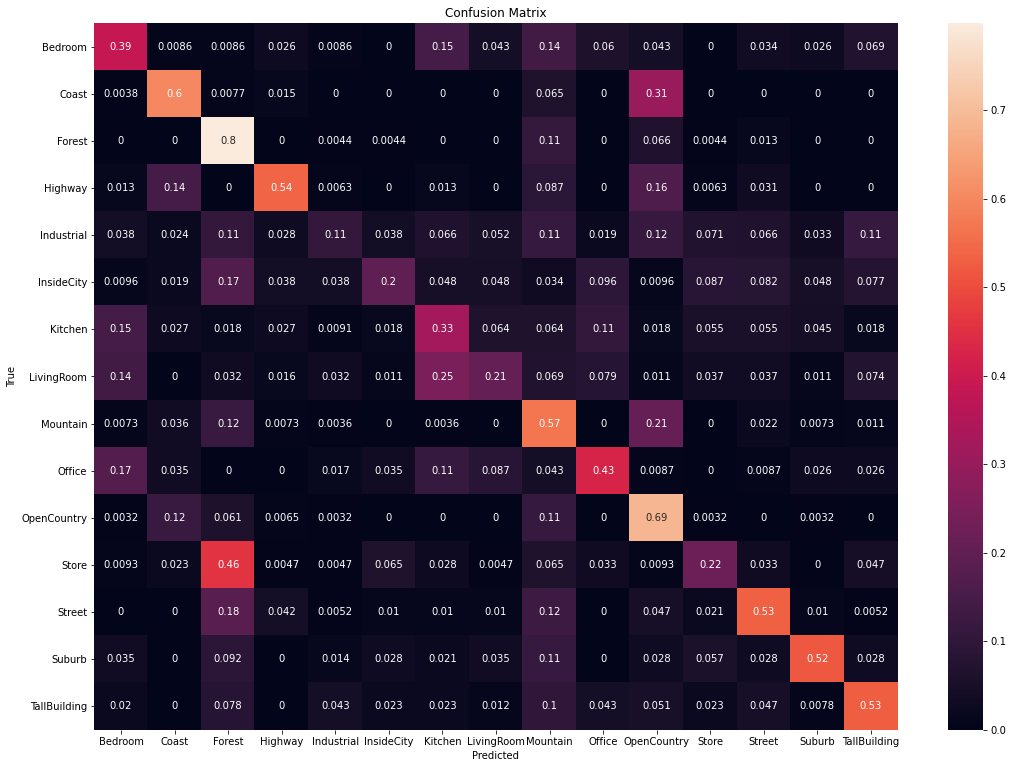

In [47]:
pltu.plotConfusionMatrix(cmAdam3, labels, "confusion_matrix_augmentation_adam_3", "images_point_two/")

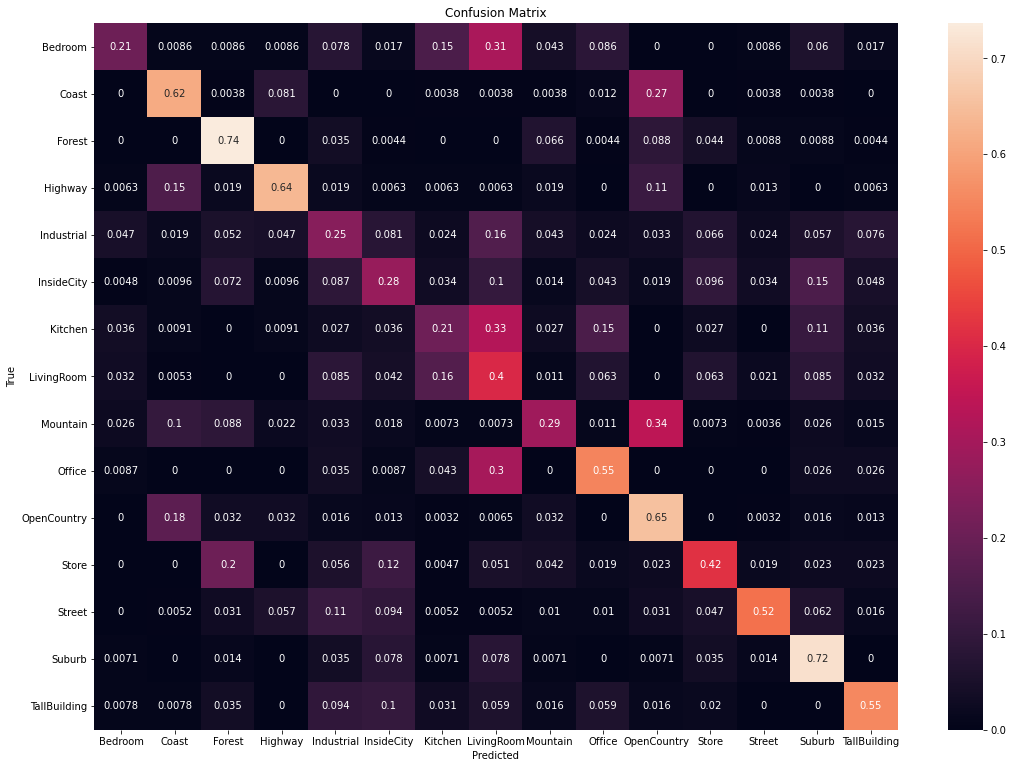

In [48]:
pltu.plotConfusionMatrix(cmAdam5, labels, "confusion_matrix_augmentation_adam_5", "images_point_two/")

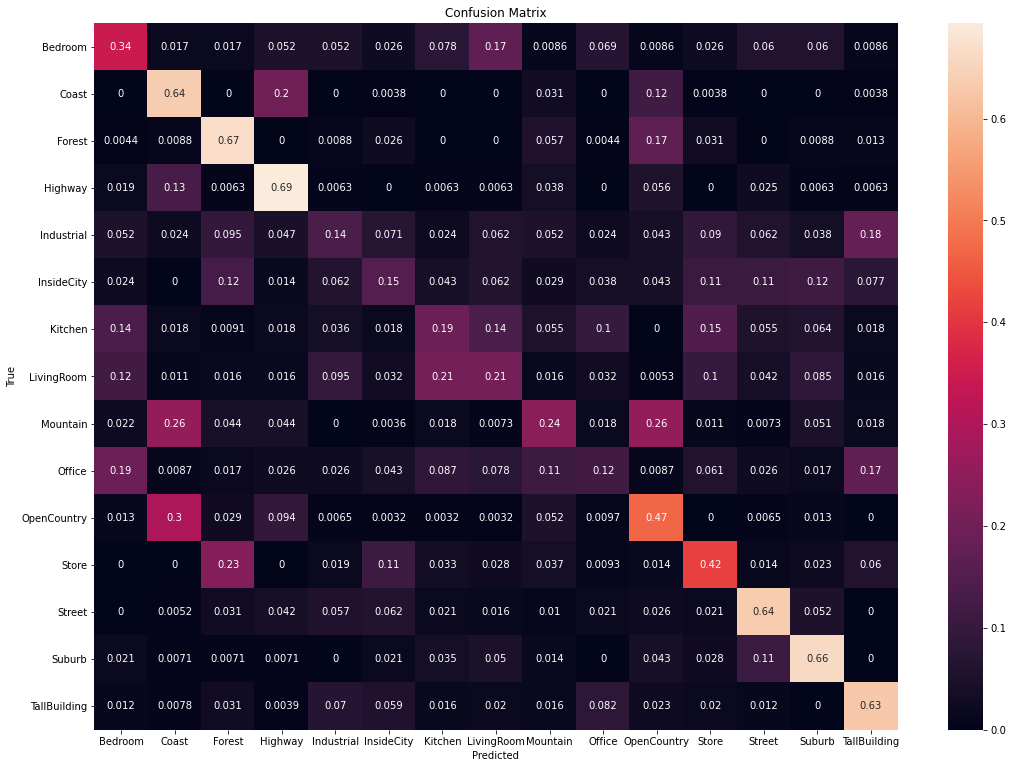

In [49]:
pltu.plotConfusionMatrix(cmAdam7, labels, "confusion_matrix_augmentation_adam_7", "images_point_two/")

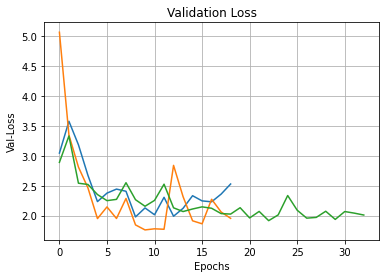

In [50]:
pltu.validationLoss(historyAdam3, "images_point_two", "validation_loss_adam_3")
pltu.validationLoss(historyAdam5, "images_point_two", "validation_loss_adam_5")
pltu.validationLoss(historyAdam7, "images_point_two", "validation_loss_adam_7")

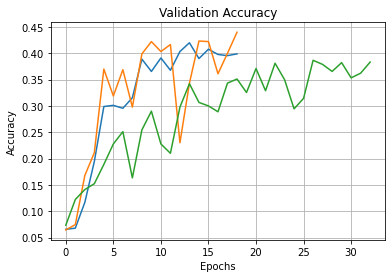

In [51]:
pltu.validationAccuracy(historyAdam3, "images_point_two", "validation_acc_3")
pltu.validationAccuracy(historyAdam5, "images_point_two", "validation_acc_5")
pltu.validationAccuracy(historyAdam7, "images_point_two", "validation_acc_7")

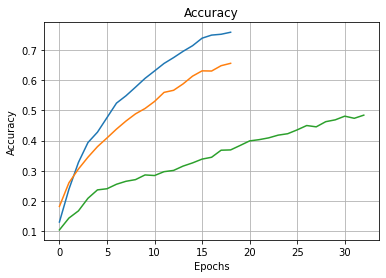

In [52]:
pltu.plottingAccuracy(historyAdam3, "images_point_two", "accuracy_3")
pltu.plottingAccuracy(historyAdam5, "images_point_two", "accuracy_5")
pltu.plottingAccuracy(historyAdam7, "images_point_two", "accuracy_7")

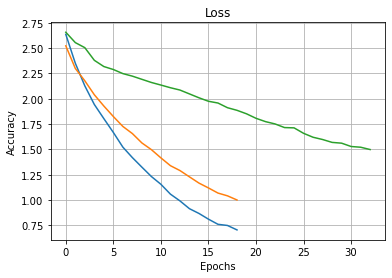

In [53]:
pltu.plottingLoss(historyAdam3, "images_point_two", "loss_1")
pltu.plottingLoss(historyAdam5, "images_point_two", "loss_3")
pltu.plottingLoss(historyAdam7, "images_point_two", "loss_7")

# Ensemle Of Network

The idea is to combine a CNN and the use of the majority vote in the average of the prediction probabilities.

Ensemble a new network with 10 iterations

In [54]:
earlyStopping = EarlyStopping(min_delta=0.0, patience = 10)
prediction = np.zeros((xTest.shape[0],15))
predictionVoting = []
loss = []
validationLoss = []
validationAccuracy = []
accuracy = []

for i in range(10):
    network = Sequential([
        Conv2D(filters=8,kernel_size=3,strides=1,padding = 'valid',activation='relu',input_shape=(64,64,1)),
        BatchNormalization(axis = 1),
        MaxPooling2D(pool_size=2,strides=2),
        Dropout(0.2),
        Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
        BatchNormalization(axis = 1),
        MaxPooling2D(pool_size=2,strides=2),
        Dropout(0.2),
        Conv2D(filters=32,kernel_size=3,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
        Flatten(),
        Dense(numberOfClasses,activation='relu',kernel_initializer=norm,bias_initializer='zeros'),
        BatchNormalization(axis = 1),
        Dense(numberOfClasses,activation='softmax')
    ])
    network.compile(loss='categorical_crossentropy',optimizer=adam,metrics = ['accuracy'])
    historyNetwork=network.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])
    preditcion = prediction + network.predict(xTest)
    predictionVoting.append(dsu.predictClass(network.predict(xTest))) ## ma non fa il voting dato che si allenano in maniera indipendenti le reti
    #qua siamo ancora dentro il ciclo for, non può sapre delle altre reti ???
    loss.append(historyNetwork.history['loss'])
    validationLoss.append(historyNetwork.history['val_loss'])
    validationAccuracy.append(historyNetwork.history['val_accuracy'])
    accuracy.append(historyNetwork.history['accuracy'])

prediction = prediction/10
    

Epoch 1/100
160/160 [==============================] - 11s 64ms/step - loss: 2.5504 - accuracy: 0.1622 - val_loss: 3.1958 - val_accuracy: 0.0644
Epoch 2/100
160/160 [==============================] - 11s 71ms/step - loss: 2.2581 - accuracy: 0.2745 - val_loss: 4.0248 - val_accuracy: 0.0944
Epoch 3/100
160/160 [==============================] - 12s 72ms/step - loss: 2.0880 - accuracy: 0.3296 - val_loss: 3.1310 - val_accuracy: 0.1378
Epoch 4/100
160/160 [==============================] - 11s 70ms/step - loss: 1.9478 - accuracy: 0.3814 - val_loss: 2.5771 - val_accuracy: 0.1889
Epoch 5/100
160/160 [==============================] - 11s 70ms/step - loss: 1.8241 - accuracy: 0.4131 - val_loss: 2.3560 - val_accuracy: 0.2833
Epoch 6/100
160/160 [==============================] - 11s 70ms/step - loss: 1.7118 - accuracy: 0.4475 - val_loss: 2.2878 - val_accuracy: 0.2933
Epoch 7/100
160/160 [==============================] - 11s 71ms/step - loss: 1.6110 - accuracy: 0.4784 - val_loss: 2.0964 - val_ac

160/160 [==============================] - 11s 71ms/step - loss: 1.1651 - accuracy: 0.5945 - val_loss: 2.2419 - val_accuracy: 0.3711
Epoch 21/100
160/160 [==============================] - 11s 72ms/step - loss: 1.1387 - accuracy: 0.5984 - val_loss: 2.4113 - val_accuracy: 0.3178
Epoch 22/100
160/160 [==============================] - 12s 72ms/step - loss: 1.1133 - accuracy: 0.6161 - val_loss: 2.1630 - val_accuracy: 0.3944
Epoch 23/100
160/160 [==============================] - 11s 71ms/step - loss: 1.0616 - accuracy: 0.6269 - val_loss: 3.0415 - val_accuracy: 0.2533
Epoch 24/100
160/160 [==============================] - 12s 73ms/step - loss: 1.0506 - accuracy: 0.6339 - val_loss: 2.3093 - val_accuracy: 0.3633
Epoch 25/100
160/160 [==============================] - 12s 72ms/step - loss: 1.0431 - accuracy: 0.6351 - val_loss: 2.2949 - val_accuracy: 0.3811
Epoch 1/100
160/160 [==============================] - 12s 72ms/step - loss: 2.5909 - accuracy: 0.1592 - val_loss: 3.4312 - val_accuracy:

160/160 [==============================] - 10s 63ms/step - loss: 0.7574 - accuracy: 0.7467 - val_loss: 2.0425 - val_accuracy: 0.4589
Epoch 19/100
160/160 [==============================] - 10s 63ms/step - loss: 0.7106 - accuracy: 0.7673 - val_loss: 2.4101 - val_accuracy: 0.4022
Epoch 20/100
160/160 [==============================] - 10s 63ms/step - loss: 0.6685 - accuracy: 0.7759 - val_loss: 2.3351 - val_accuracy: 0.4022
Epoch 21/100
160/160 [==============================] - 10s 63ms/step - loss: 0.6542 - accuracy: 0.7753 - val_loss: 2.2849 - val_accuracy: 0.4278
Epoch 1/100
160/160 [==============================] - 11s 64ms/step - loss: 2.4637 - accuracy: 0.1878 - val_loss: 5.1759 - val_accuracy: 0.0656
Epoch 2/100
160/160 [==============================] - 9s 59ms/step - loss: 2.1436 - accuracy: 0.3031 - val_loss: 7.3875 - val_accuracy: 0.0656
Epoch 3/100
160/160 [==============================] - 10s 60ms/step - loss: 1.9492 - accuracy: 0.3625 - val_loss: 5.0483 - val_accuracy: 0.

160/160 [==============================] - 10s 63ms/step - loss: 1.1148 - accuracy: 0.6149 - val_loss: 2.2920 - val_accuracy: 0.3700
Epoch 20/100
160/160 [==============================] - 10s 63ms/step - loss: 1.0834 - accuracy: 0.6247 - val_loss: 2.2128 - val_accuracy: 0.3533
Epoch 21/100
160/160 [==============================] - 10s 63ms/step - loss: 1.0443 - accuracy: 0.6357 - val_loss: 2.4088 - val_accuracy: 0.3600
Epoch 22/100
160/160 [==============================] - 10s 63ms/step - loss: 1.0407 - accuracy: 0.6367 - val_loss: 2.2204 - val_accuracy: 0.3822
Epoch 1/100
160/160 [==============================] - 11s 64ms/step - loss: 2.5247 - accuracy: 0.1506 - val_loss: 13.9797 - val_accuracy: 0.0656
Epoch 2/100
160/160 [==============================] - 10s 64ms/step - loss: 2.3547 - accuracy: 0.2186 - val_loss: 34.5433 - val_accuracy: 0.0656
Epoch 3/100
160/160 [==============================] - 10s 64ms/step - loss: 2.2070 - accuracy: 0.2804 - val_loss: 7.9922 - val_accuracy:

Plot of some graphs

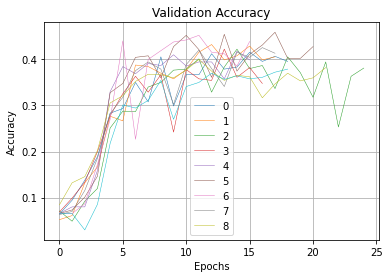

In [55]:
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
for p in validationAccuracy:
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.plot(p,linewidth=0.5)

plt.grid()

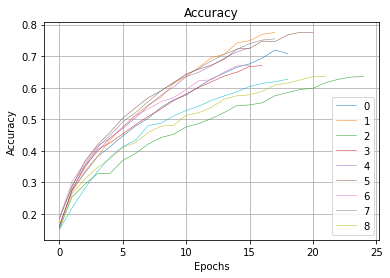

In [56]:
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
for p in accuracy:
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.plot(p,linewidth=0.5)
plt.grid()

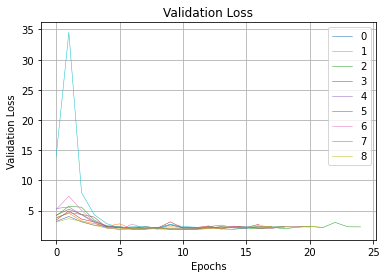

In [57]:
plt.title("Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
for p in validationLoss:
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.plot(p,linewidth=0.5)
plt.grid()

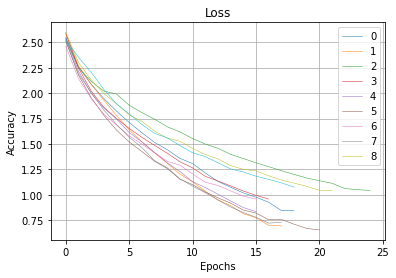

In [58]:
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
for p in loss:
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.plot(p,linewidth=0.5)
plt.grid()

## more convolutional layer

In [59]:
sgd = tf.keras.optimizers.SGD(momentum=0.9,nesterov=True)
norm = ks.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
moreConvModel = Sequential([
    #first convolutional layer
    Conv2D(8, 3,strides=1, padding='valid', activation='relu', input_shape=(64,64,1)),
    MaxPooling2D(pool_size=2,strides=2),
    
    #second convolutional layer
    Conv2D(16, 3,strides=1, padding='valid',activation='relu',input_shape=(64,64,1)),
    MaxPooling2D(pool_size=2,strides=2),
    
    #third convolutional layer
    Conv2D(32, 3,strides=1, padding='valid',activation='relu',input_shape=(64,64,1)),
    MaxPooling2D(pool_size=2,strides=2),
    
    #four convolutional layer
    Conv2D(32, 3,strides=1, padding='valid',activation='relu',input_shape=(64,64,1)),

    #five convolutional layer
    Conv2D(32, 3,strides=1, padding='valid',activation='relu',input_shape=(64,64,1)),
    
    Flatten(),
    Dense(numberOfClasses, activation='relu',kernel_initializer=norm, bias_initializer='zeros'),
    Dense(numberOfClasses, activation='relu',kernel_initializer=norm, bias_initializer='zeros'),
    Dense(numberOfClasses, activation='softmax')
])

baseModel.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])

In [60]:
moreConvModel.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 62, 62, 8)         80        
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 4, 4, 32)        

In [61]:
earlyStopping = EarlyStopping(min_delta=0.10,patience = 10, monitor='val_loss')

history=baseModel.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])

Epoch 1/100
160/160 [==============================] - 6s 34ms/step - loss: 0.2784 - accuracy: 0.9061 - val_loss: 4.4873 - val_accuracy: 0.3378
Epoch 2/100
160/160 [==============================] - 6s 35ms/step - loss: 0.2860 - accuracy: 0.9014 - val_loss: 4.8374 - val_accuracy: 0.3322
Epoch 3/100
160/160 [==============================] - 5s 34ms/step - loss: 0.3322 - accuracy: 0.8878 - val_loss: 5.0377 - val_accuracy: 0.3478
Epoch 4/100
160/160 [==============================] - 5s 34ms/step - loss: 0.3092 - accuracy: 0.8988 - val_loss: 5.0727 - val_accuracy: 0.3300
Epoch 5/100
160/160 [==============================] - 5s 34ms/step - loss: 0.2623 - accuracy: 0.9096 - val_loss: 5.5596 - val_accuracy: 0.3122
Epoch 6/100
160/160 [==============================] - 5s 34ms/step - loss: 0.2310 - accuracy: 0.9245 - val_loss: 5.9063 - val_accuracy: 0.3433
Epoch 7/100
160/160 [==============================] - 5s 34ms/step - loss: 0.1928 - accuracy: 0.9402 - val_loss: 6.0557 - val_accuracy:

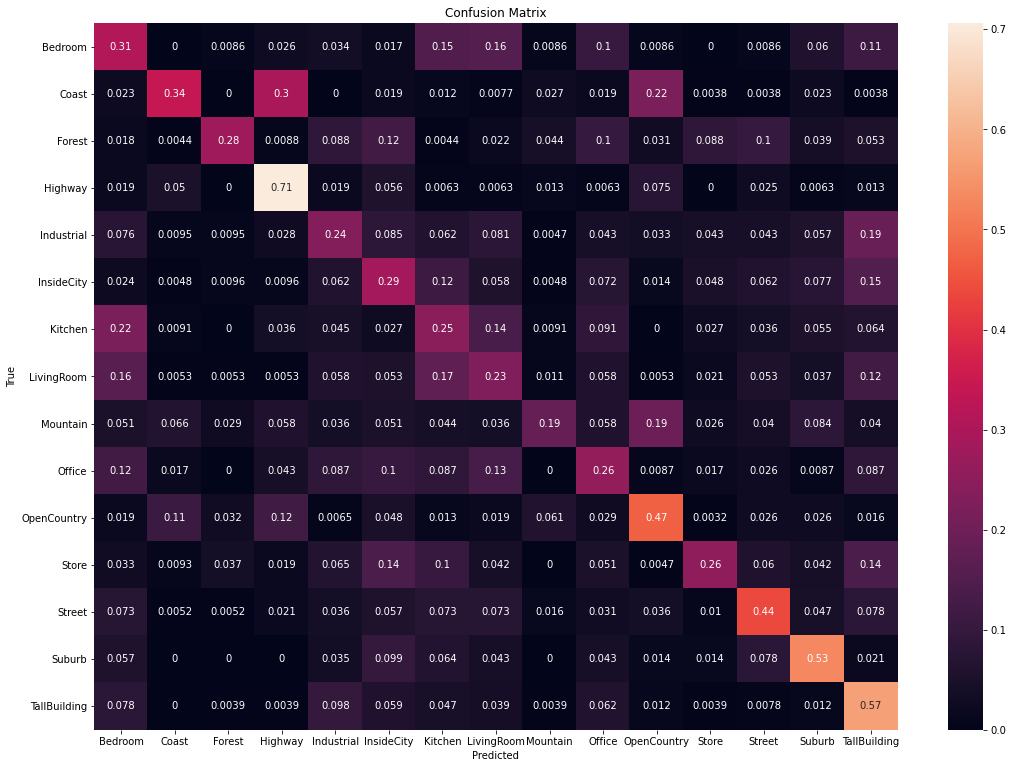

In [62]:
pltu.plotConfusionMatrix(cm, labels, "confusion_matrix_augmentation", "images_point_two/")

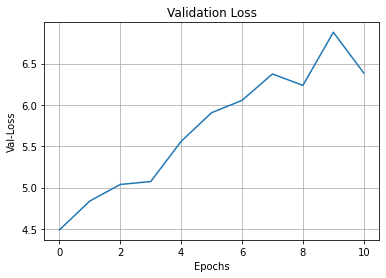

In [63]:
pltu.validationLoss(history, "images_point_two", "validation_loss_1")

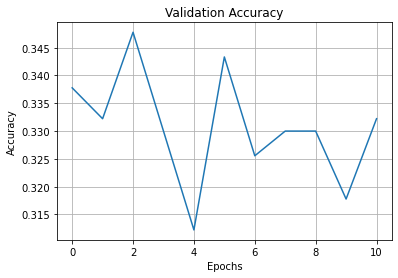

In [64]:
pltu.validationAccuracy(history, "images_point_two", "validation_acc_1")

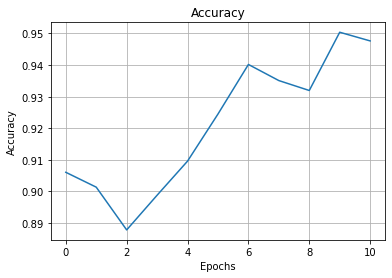

In [65]:
pltu.plottingAccuracy(history, "images_point_two", "accuracy_1")

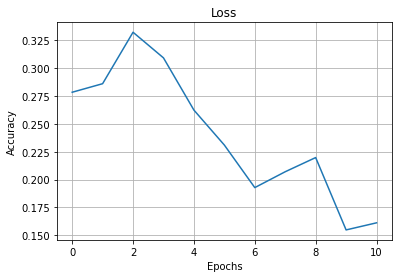

In [66]:
pltu.plottingLoss(history, "images_point_two", "loss_1")

In [67]:
print('Classification Report')
print(classification_report(yTest, yPred, target_names=labels))

Classification Report
              precision    recall  f1-score   support

     Bedroom       0.17      0.31      0.22       116
       Coast       0.56      0.34      0.42       260
      Forest       0.65      0.28      0.39       228
     Highway       0.41      0.71      0.52       160
  Industrial       0.28      0.24      0.26       211
  InsideCity       0.24      0.29      0.26       208
     Kitchen       0.13      0.25      0.17       110
  LivingRoom       0.23      0.23      0.23       189
    Mountain       0.52      0.19      0.27       274
      Office       0.17      0.26      0.20       115
 OpenCountry       0.49      0.47      0.48       310
       Store       0.47      0.26      0.33       215
      Street       0.43      0.44      0.43       192
      Suburb       0.39      0.53      0.45       141
TallBuilding       0.42      0.57      0.48       256

    accuracy                           0.36      2985
   macro avg       0.37      0.36      0.34      2985
weig